# 주제

## 코스피 데이터와 경제지표를 이용한 데이터 시각화

## import

In [287]:
import pandas as pd

In [288]:
df_list = []

## kospi

In [289]:
kospi_data = pd.read_csv('data/kospi_data.csv')
kospi_data.rename(columns={'Close':'Price'}, inplace=True)
kospi_data = kospi_data[['Date', 'Price', 'Open', 'High', 'Low']]
df_list.append('kospi_data')
# Filter the DataFrame to include only data from 2013 to January 2023
kospi_data = kospi_data[(kospi_data['Date'] >= '2013-01-01') & (kospi_data['Date'] < '2022-09-01')]
kospi_data

,Date,Price,Open,High,Low
8644,2013-01-02,2031.10,2013.74,2033.66,2012.30
8645,2013-01-03,2019.41,2041.24,2042.48,2018.49
8646,2013-01-04,2011.94,2017.88,2018.63,2001.53
8647,2013-01-07,2011.25,2012.15,2014.00,1996.47
8648,2013-01-08,1997.94,2003.22,2009.99,1997.91
...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48


# 세계 주요 지수의 등락율 비교 (2000-2022, 월별)

## 세계 주요 지수 목록

- KOSPI Composite Index(Korea)
- S&P 500(US)
- Dow Jones Industrial Average(US)
- NASDAQ Composite(US)
- FTSE 100(UK)
- DAX PERFORMANCE-INDEX(Germany)
- Nikkei 225(Japan)
- EURO STOXX 50
- BSE sensex(India)

## 데이터최적화

### sp500_data

In [290]:
sp500_data = pd.read_csv('data/sp500_data.csv')
df_list.append('sp500_data')
sp500_data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/31/2023,"4,076.60","4,020.85","4,077.16","4,020.44",NaN,1.46%
1,01/30/2023,"4,017.77","4,049.27","4,063.85","4,015.55",NaN,-1.30%
2,01/27/2023,"4,070.56","4,053.72","4,094.21","4,048.70",NaN,0.25%
3,01/26/2023,"4,060.43","4,036.08","4,061.57","4,013.29",NaN,1.10%
4,01/25/2023,"4,016.22","3,982.71","4,019.55","3,949.06",NaN,-0.02%
...,...,...,...,...,...,...,...
2533,01/08/2013,"1,457.15","1,461.89","1,461.89","1,451.64",NaN,-0.32%
2534,01/07/2013,"1,461.89","1,466.47","1,466.47","1,456.62",NaN,-0.31%
2535,01/04/2013,"1,466.47","1,459.37","1,467.94","1,458.99",NaN,0.49%
2536,01/03/2013,"1,459.37","1,462.42","1,465.47","1,455.53",NaN,-0.21%


In [291]:
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"]).dt.strftime('%Y-%m-%d')
sp500_data.sort_values(by='Date', ascending=True, inplace=True)
sp500_data.reset_index(drop=True, inplace=True)
sp500_data = sp500_data[['Date', 'Price', 'Open', 'High', 'Low']]
sp500_data = sp500_data[(sp500_data['Date'] >= '2013-01-01') & (sp500_data['Date'] < '2022-09-01')]
# remove commas from the 'Price' column and convert it to a float
sp500_data['Price'] = sp500_data['Price'].str.replace(',', '').astype(float)
sp500_data

,Date,Price,Open,High,Low
0,2013-01-02,1462.42,"1,426.19","1,462.43","1,426.19"
1,2013-01-03,1459.37,"1,462.42","1,465.47","1,455.53"
2,2013-01-04,1466.47,"1,459.37","1,467.94","1,458.99"
3,2013-01-07,1461.89,"1,466.47","1,466.47","1,456.62"
4,2013-01-08,1457.15,"1,461.89","1,461.89","1,451.64"
...,...,...,...,...,...
2429,2022-08-25,4199.12,"4,153.26","4,200.54","4,147.59"
2430,2022-08-26,4057.66,"4,198.74","4,203.04","4,057.66"
2431,2022-08-29,4030.61,"4,034.58","4,062.99","4,017.42"
2432,2022-08-30,3986.16,"4,041.25","4,044.98","3,965.21"


### dowjones_data

In [292]:
dowjones_data = pd.read_csv('data/dowjones_data.csv')
df_list.append('dowjones_data')
dowjones_data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/31/2023,"34,086.89","33,803.56","34,095.23","33,665.78",330.30M,1.10%
1,01/30/2023,"33,717.68","33,855.66","34,054.40","33,695.24",334.51M,-0.76%
2,01/27/2023,"33,977.55","33,952.93","34,163.12","33,832.00",432.42M,0.09%
3,01/26/2023,"33,948.29","33,872.43","33,951.95","33,635.60",313.25M,0.61%
4,01/25/2023,"33,743.71","33,538.36","33,773.09","33,273.21",336.09M,0.03%
...,...,...,...,...,...,...,...
2533,01/08/2013,"13,328.85","13,377.42","13,377.42","13,293.13",129.57M,-0.41%
2534,01/07/2013,"13,384.29","13,436.13","13,436.13","13,343.32",113.12M,-0.38%
2535,01/04/2013,"13,435.21","13,391.05","13,447.11","13,376.23",107.59M,0.33%
2536,01/03/2013,"13,391.36","13,413.01","13,430.60","13,358.30",129.63M,-0.16%


In [293]:
dowjones_data["Date"] = pd.to_datetime(dowjones_data["Date"]).dt.strftime('%Y-%m-%d')

In [294]:
dowjones_data.sort_values(by='Date', ascending=True, inplace=True)

In [295]:
dowjones_data.reset_index(drop=True, inplace=True)
dowjones_data = dowjones_data[['Date', 'Price', 'Open', 'High', 'Low']]
dowjones_data = dowjones_data[(dowjones_data['Date'] >= '2013-01-01') & (dowjones_data['Date'] < '2022-09-01')]
# remove commas from the 'Price' column and convert it to a float
dowjones_data['Price'] = dowjones_data['Price'].str.replace(',', '').astype(float)
dowjones_data

,Date,Price,Open,High,Low
0,2013-01-02,13412.55,"13,104.30","13,412.71","13,104.30"
1,2013-01-03,13391.36,"13,413.01","13,430.60","13,358.30"
2,2013-01-04,13435.21,"13,391.05","13,447.11","13,376.23"
3,2013-01-07,13384.29,"13,436.13","13,436.13","13,343.32"
4,2013-01-08,13328.85,"13,377.42","13,377.42","13,293.13"
...,...,...,...,...,...
2429,2022-08-25,33293.66,"33,029.27","33,303.58","32,893.71"
2430,2022-08-26,32282.80,"33,293.43","33,363.74","32,278.69"
2431,2022-08-29,32099.65,"32,059.67","32,325.16","31,973.05"
2432,2022-08-30,31790.74,"32,189.30","32,204.45","31,647.62"


### nasdaq_data

In [296]:
nasdaq_data = pd.read_csv('data/nasdaq_data.csv')
df_list.append('nasdaq_data')
nasdaq_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [297]:
nasdaq_data["Date"] = pd.to_datetime(nasdaq_data["Date"]).dt.strftime('%Y-%m-%d')
nasdaq_data.sort_values(by='Date', ascending=True, inplace=True)
nasdaq_data.reset_index(drop=True, inplace=True)
nasdaq_data.rename(columns={'Close/Last':'Price'}, inplace=True)
nasdaq_data = nasdaq_data[['Date', 'Price', 'Open', 'High', 'Low']]
nasdaq_data = nasdaq_data[(nasdaq_data['Date'] >= '2013-01-01') & (nasdaq_data['Date'] < '2022-09-01')]
nasdaq_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


### ftse100_data

In [298]:
ftse100_data = pd.read_csv('data/ftse100_data.csv')
df_list.append('ftse100_data')
ftse100_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [299]:
ftse100_data["Date"] = pd.to_datetime(ftse100_data["Date"]).dt.strftime('%Y-%m-%d')
ftse100_data.sort_values(by='Date', ascending=True, inplace=True)
ftse100_data.reset_index(drop=True, inplace=True)
ftse100_data.rename(columns={'Close/Last':'Price'}, inplace=True)
ftse100_data = ftse100_data[['Date', 'Price', 'Open', 'High', 'Low']]
ftse100_data = ftse100_data[(ftse100_data['Date'] >= '2013-01-01') & (ftse100_data['Date'] < '2022-09-01')]
ftse100_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


### dax_data

In [300]:
dax_data = pd.read_csv('data/dax_data.csv')
df_list.append('dax_data')
dax_data

,Date,Close/Last,Volume,Open,High,Low
0,01/30/2023,11393.81,--,11512.34,11553.31,11388.54
1,01/27/2023,11621.71,--,11470.47,11691.89,11470.27
2,01/26/2023,11512.41,--,11458.40,11516.05,11341.19
3,01/25/2023,11313.36,--,11146.53,11334.22,11069.18
4,01/24/2023,11334.27,--,11302.93,11378.15,11282.65
...,...,...,...,...,...,...
2536,02/07/2013,3165.13,--,3168.48,3170.42,3135.98
2537,02/06/2013,3168.48,--,3171.58,3174.82,3157.35
2538,02/05/2013,3171.58,--,3131.17,3178.52,3136.82
2539,02/04/2013,3131.17,--,3179.10,3169.63,3130.57


In [301]:
dax_data["Date"] = pd.to_datetime(dax_data["Date"]).dt.strftime('%Y-%m-%d')
dax_data.sort_values(by='Date', ascending=True, inplace=True)
dax_data.reset_index(drop=True, inplace=True)
dax_data.rename(columns={'Close/Last':'Price'}, inplace=True)
dax_data = dax_data[['Date', 'Price', 'Open', 'High', 'Low']]
dax_data = dax_data[(dax_data['Date'] >= '2013-01-01') & (dax_data['Date'] < '2022-09-01')]
dax_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


### nikkei225_data

In [302]:
nikkei225_data = pd.read_csv('data/nikkei225_data.csv')
nikkei225_data.rename(columns={'Close':'Price'}, inplace=True)
nikkei225_data = nikkei225_data[['Date', 'Price', 'Open', 'High', 'Low']]
df_list.append('nikkei225_data')
nikkei225_data = nikkei225_data[(nikkei225_data['Date'] >= '2013-01-01') & (nikkei225_data['Date'] < '2022-09-01')]
nikkei225_data

,Date,Price,Open,High,Low
0,2013-01-04,10688.11,10604.50,10734.23,10602.24
1,2013-01-07,10599.01,10743.69,10743.69,10589.70
2,2013-01-08,10508.06,10544.21,10602.12,10463.43
3,2013-01-09,10578.57,10405.67,10620.70,10398.61
4,2013-01-10,10652.64,10635.11,10686.12,10619.65
...,...,...,...,...,...
2356,2022-08-25,28479.01,28415.11,28534.71,28357.03
2357,2022-08-26,28641.38,28639.47,28792.71,28624.70
2358,2022-08-29,27878.96,28161.06,28177.70,27788.12
2359,2022-08-30,28195.58,28086.72,28233.80,27944.27


### eurostoxx50_data

In [303]:
eurostoxx50_data = pd.read_csv('data/eurostoxx50_data.csv')
eurostoxx50_data.rename(columns={'Close':'Price'}, inplace=True)
eurostoxx50_data = eurostoxx50_data[['Date', 'Price', 'Open', 'High', 'Low']]
df_list.append('eurostoxx50_data')
eurostoxx50_data = eurostoxx50_data[(eurostoxx50_data['Date'] >= '2013-01-01') & (eurostoxx50_data['Date'] < '2022-09-01')]
eurostoxx50_data

,Date,Price,Open,High,Low
0,2013-01-03,2701.219971,2705.800049,2705.800049,2689.300049
1,2013-01-04,2709.350098,2696.939941,2711.020020,2690.110107
2,2013-01-07,2695.560059,2712.250000,2714.179932,2691.040039
3,2013-01-08,2691.449951,2690.909912,2710.199951,2684.899902
4,2013-01-09,2706.389893,2697.510010,2710.489990,2691.000000
...,...,...,...,...,...
2421,2022-08-25,3674.540039,3670.570068,3703.520020,3659.750000
2422,2022-08-26,3603.679932,3682.020020,3706.489990,3593.479980
2423,2022-08-29,3570.510010,3600.479980,3600.479980,3537.239990
2424,2022-08-30,3561.919922,3576.889893,3629.500000,3545.919922


### bsesensex_data

In [304]:
bsesensex_data = pd.read_csv('data/bsesensex_data.csv')
bsesensex_data.sort_values(by='Date', ascending=True, inplace=True)
bsesensex_data.reset_index(drop=True, inplace=True)
bsesensex_data.rename(columns={'Close':'Price'}, inplace=True)
bsesensex_data = bsesensex_data[['Date', 'Price', 'Open', 'High', 'Low']]
df_list.append('bsesensex_data')
bsesensex_data = bsesensex_data[(bsesensex_data['Date'] >= '2013-01-01') & (bsesensex_data['Date'] < '2022-09-01')]
bsesensex_data

,Date,Price,Open,High,Low
0,2013-01-01,19580.81,19513.45,19623.76,19508.93
1,2013-01-02,19714.24,19693.30,19756.68,19686.50
2,2013-01-03,19764.78,19771.03,19786.30,19693.29
3,2013-01-04,19784.08,19782.59,19797.44,19679.99
4,2013-01-07,19691.42,19820.56,19856.43,19654.46
...,...,...,...,...,...
2387,2022-08-24,59085.43,58853.32,59170.87,58760.09
2388,2022-08-25,58774.72,59315.98,59484.35,58666.41
2389,2022-08-26,58833.87,59050.67,59321.65,58722.69
2390,2022-08-29,57972.62,57367.47,58208.30,57367.47


## 데이터셋 조회

In [305]:
sp500_data

,Date,Price,Open,High,Low
0,2013-01-02,1462.42,"1,426.19","1,462.43","1,426.19"
1,2013-01-03,1459.37,"1,462.42","1,465.47","1,455.53"
2,2013-01-04,1466.47,"1,459.37","1,467.94","1,458.99"
3,2013-01-07,1461.89,"1,466.47","1,466.47","1,456.62"
4,2013-01-08,1457.15,"1,461.89","1,461.89","1,451.64"
...,...,...,...,...,...
2429,2022-08-25,4199.12,"4,153.26","4,200.54","4,147.59"
2430,2022-08-26,4057.66,"4,198.74","4,203.04","4,057.66"
2431,2022-08-29,4030.61,"4,034.58","4,062.99","4,017.42"
2432,2022-08-30,3986.16,"4,041.25","4,044.98","3,965.21"


In [306]:
dowjones_data

,Date,Price,Open,High,Low
0,2013-01-02,13412.55,"13,104.30","13,412.71","13,104.30"
1,2013-01-03,13391.36,"13,413.01","13,430.60","13,358.30"
2,2013-01-04,13435.21,"13,391.05","13,447.11","13,376.23"
3,2013-01-07,13384.29,"13,436.13","13,436.13","13,343.32"
4,2013-01-08,13328.85,"13,377.42","13,377.42","13,293.13"
...,...,...,...,...,...
2429,2022-08-25,33293.66,"33,029.27","33,303.58","32,893.71"
2430,2022-08-26,32282.80,"33,293.43","33,363.74","32,278.69"
2431,2022-08-29,32099.65,"32,059.67","32,325.16","31,973.05"
2432,2022-08-30,31790.74,"32,189.30","32,204.45","31,647.62"


In [307]:
nasdaq_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


In [308]:
ftse100_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


In [309]:
dax_data

,Date,Price,Open,High,Low
0,2013-02-01,3179.10,3142.13,3183.14,3154.91
1,2013-02-04,3131.17,3179.10,3169.63,3130.57
2,2013-02-05,3171.58,3131.17,3178.52,3136.82
3,2013-02-06,3168.48,3171.58,3174.82,3157.35
4,2013-02-07,3165.13,3168.48,3170.42,3135.98
...,...,...,...,...,...
2433,2022-08-25,12639.27,12506.37,12641.26,12471.98
2434,2022-08-26,12141.71,12630.58,12655.84,12141.52
2435,2022-08-29,12017.67,12021.05,12124.87,11981.42
2436,2022-08-30,11883.14,12093.06,12101.85,11790.02


In [310]:
nikkei225_data

,Date,Price,Open,High,Low
0,2013-01-04,10688.11,10604.50,10734.23,10602.24
1,2013-01-07,10599.01,10743.69,10743.69,10589.70
2,2013-01-08,10508.06,10544.21,10602.12,10463.43
3,2013-01-09,10578.57,10405.67,10620.70,10398.61
4,2013-01-10,10652.64,10635.11,10686.12,10619.65
...,...,...,...,...,...
2356,2022-08-25,28479.01,28415.11,28534.71,28357.03
2357,2022-08-26,28641.38,28639.47,28792.71,28624.70
2358,2022-08-29,27878.96,28161.06,28177.70,27788.12
2359,2022-08-30,28195.58,28086.72,28233.80,27944.27


In [311]:
eurostoxx50_data

,Date,Price,Open,High,Low
0,2013-01-03,2701.219971,2705.800049,2705.800049,2689.300049
1,2013-01-04,2709.350098,2696.939941,2711.020020,2690.110107
2,2013-01-07,2695.560059,2712.250000,2714.179932,2691.040039
3,2013-01-08,2691.449951,2690.909912,2710.199951,2684.899902
4,2013-01-09,2706.389893,2697.510010,2710.489990,2691.000000
...,...,...,...,...,...
2421,2022-08-25,3674.540039,3670.570068,3703.520020,3659.750000
2422,2022-08-26,3603.679932,3682.020020,3706.489990,3593.479980
2423,2022-08-29,3570.510010,3600.479980,3600.479980,3537.239990
2424,2022-08-30,3561.919922,3576.889893,3629.500000,3545.919922


In [312]:
bsesensex_data

,Date,Price,Open,High,Low
0,2013-01-01,19580.81,19513.45,19623.76,19508.93
1,2013-01-02,19714.24,19693.30,19756.68,19686.50
2,2013-01-03,19764.78,19771.03,19786.30,19693.29
3,2013-01-04,19784.08,19782.59,19797.44,19679.99
4,2013-01-07,19691.42,19820.56,19856.43,19654.46
...,...,...,...,...,...
2387,2022-08-24,59085.43,58853.32,59170.87,58760.09
2388,2022-08-25,58774.72,59315.98,59484.35,58666.41
2389,2022-08-26,58833.87,59050.67,59321.65,58722.69
2390,2022-08-29,57972.62,57367.47,58208.30,57367.47


## 데이터 시각화

In [313]:
df_list = list(set(df_list))
df_list

['nasdaq_data',
 'bsesensex_data',
 'nikkei225_data',
 'dax_data',
 'sp500_data',
 'eurostoxx50_data',
 'dowjones_data',
 'kospi_data',
 'ftse100_data']

In [314]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [318]:
df_list

['nasdaq_data',
 'bsesensex_data',
 'nikkei225_data',
 'dax_data',
 'sp500_data',
 'eurostoxx50_data',
 'dowjones_data',
 'kospi_data',
 'ftse100_data']

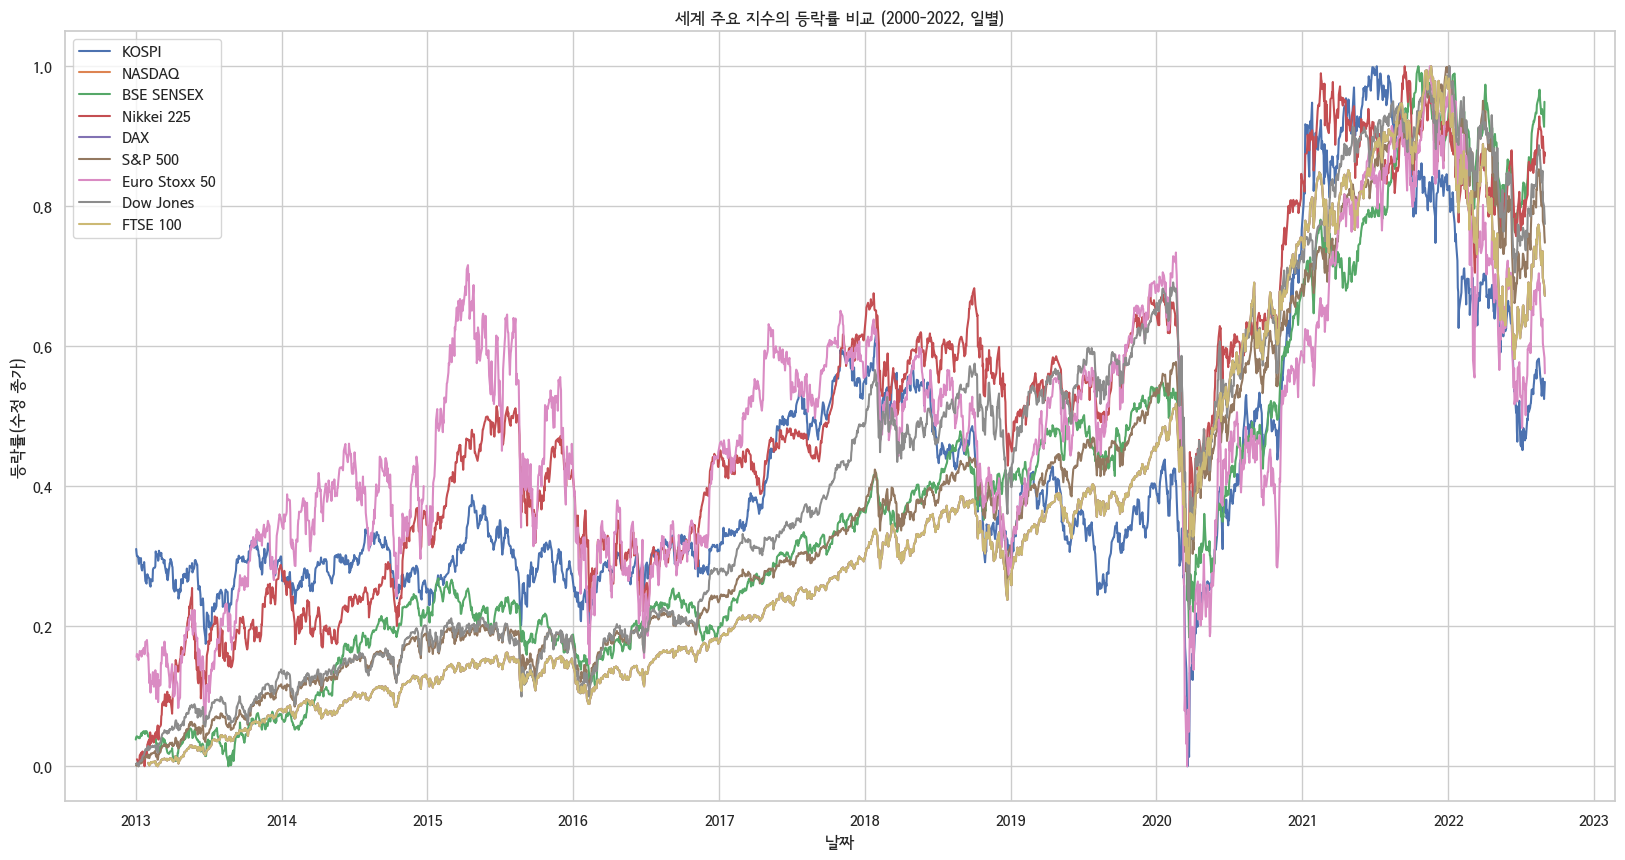

In [326]:
# 이 코드는 KOSPI, NASDAQ, BSE SENSEX, Nikkei 225, DAX 및 S&P 500 지수의 가격 추세를 정규화하여 비교하는 그래프를 그립니다.
# 정규화를 통해 각 지수의 범위가 동일하게 만들어 비교하기 쉽게 합니다.
# 각 지수의 가격 추세를 비교하여 직관적으로 표현합니다.
# 이를 통해 글로 설명하기 어려운 복잡한 데이터의 변화를 한눈에 파악할 수 있습니다.

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 데이터 프레임과 해당 라벨의 리스트를 정의합니다.
dfs = [(kospi_data, 'KOSPI'),
       (nasdaq_data, 'NASDAQ'),       
       (bsesensex_data, 'BSE SENSEX'),       
       (nikkei225_data, 'Nikkei 225'),       
       (dax_data, 'DAX'),       
       (sp500_data, 'S&P 500'),       
       (eurostoxx50_data, 'Euro Stoxx 50'),       
       (dowjones_data, 'Dow Jones'),       
       (ftse100_data, 'FTSE 100')]


# 새로운 그림을 만들고 그 크기를 설정합니다.
fig, ax = plt.subplots(figsize=(20, 10))

# 리스트 내 각 데이터 프레임에 대해 그래프로 데이터를 플로팅합니다.
for df, label in dfs:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Price_scaled'] = scaler.fit_transform(df[['Price']])
    ax.plot(df['Date'], df['Price_scaled'], label=label)

# x축을 연도별로 표시하도록 설정합니다.
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 그래프 제목, x축 라벨, y축 라벨 및 범례를 설정합니다.
ax.set_title('세계 주요 지수의 등락률 비교 (2000-2022, 일별)')
ax.set_xlabel('날짜')
ax.set_ylabel('등락률(수정 종가)')
ax.legend()

# 그래프를 보여줍니다.
plt.show()


In [320]:
import os
from datetime import datetime, timedelta
from pykrx import stock
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from   sklearn.preprocessing import MinMaxScaler

def get_world_index(ticker, start_day, end_day):
    '''
    세계 주요 주가 지수의 일별 OHCLV(Open, High, Close, Low, Volume) 데이터를 담은 DataFrame을 반환한다.
    '''
    return pdr.get_data_yahoo(ticker, start_day, end_day)

def get_normalization(df_ts):
    """
    데이터를 MinMaxScaler로 정규화한 결과를 반환한다.
    """
    return MinMaxScaler().fit_transform(df_ts)

# 날짜
now = datetime.today()
end_day = datetime(now.year, now.month, now.day)
start_day = end_day - timedelta(days =3650)

# Tickers of World Indexes
WORLD_INDEX_TICKERS = [ {'ticker':'^GSPC',     'nation':'US',          'name':'S&P 500'},
                        {'ticker':'^IXIC',     'nation':'US',          'name':'NASDAQ'},
                        {'ticker':'^N225',     'nation':'Japan',       'name':'Nikkei 225'},
                        {'ticker':'399001.SZ', 'nation':'China',       'name':'Shenzhen'},
                        {'ticker':'^KS11',     'nation':'Korea',       'name':'KOSPI'},
]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


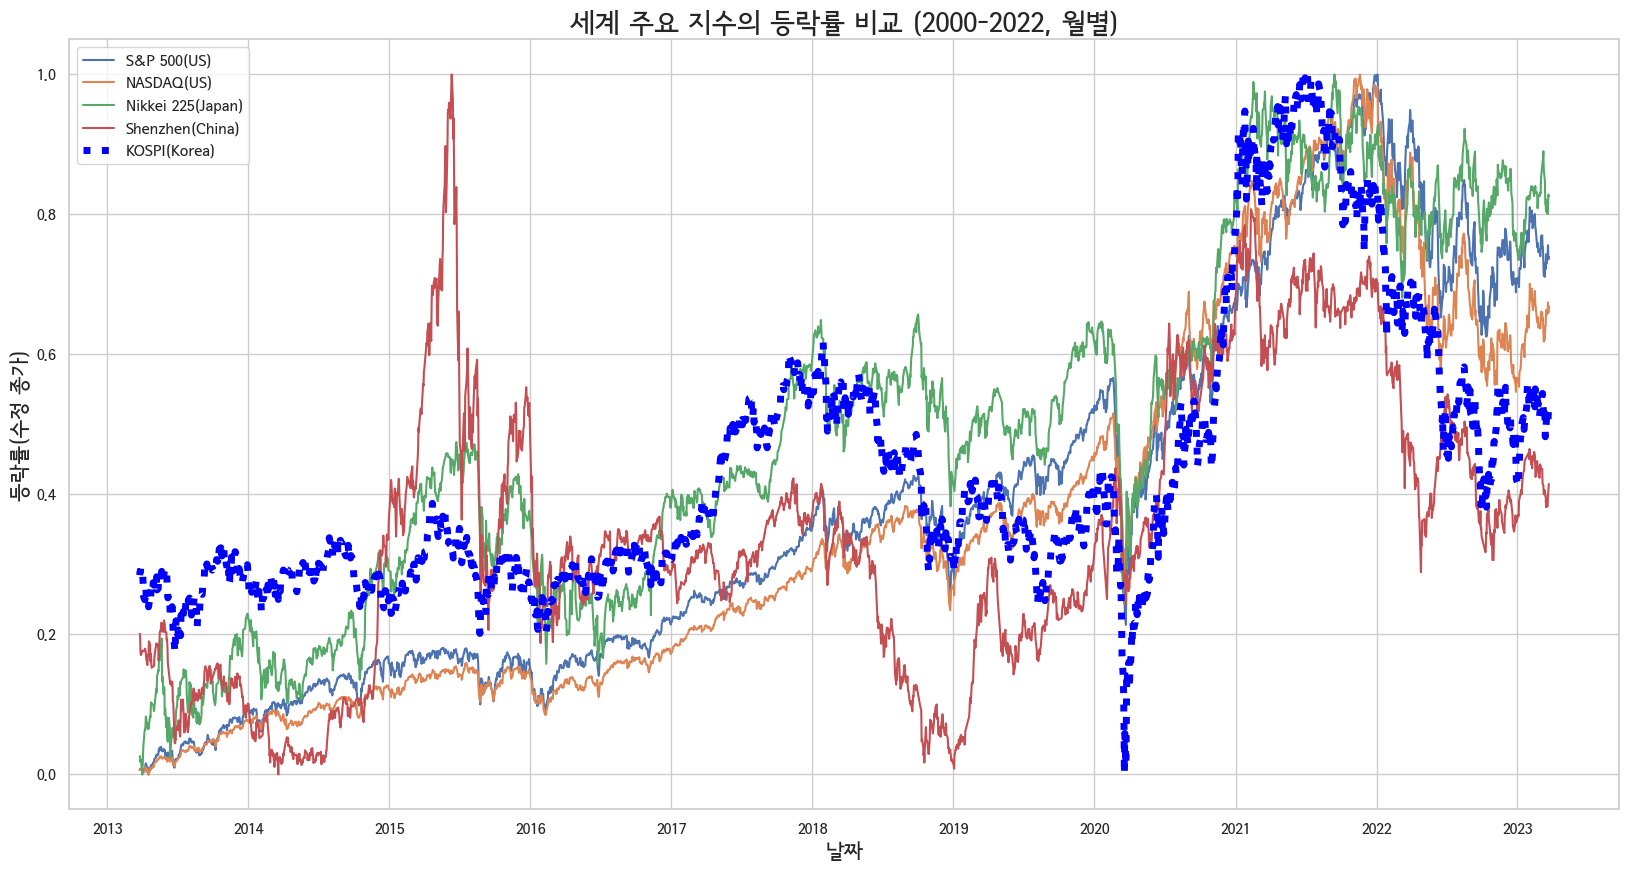

In [322]:
# Visualization: 세계 주요 지수의 등락률 비교 (2000-2022, 월별)

mpl.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)

fig = plt.figure(figsize=(20, 10)) # 그래프 크기 조절

for index in WORLD_INDEX_TICKERS:

    index_df    = get_world_index(index['ticker'], start_day, end_day)[['Close']][:]
    index_df[:] = get_normalization(index_df)
    
    if index['ticker'] == '^KS11':
        ax1 = sns.lineplot(
            data      = index_df,
            x         = 'Date',
            y         = 'Close',
            label     = index['name'] + f"({index['nation']})",
            color     = 'blue',
            linewidth = 5,
            linestyle = ':'
            
        )
    else:
        ax1 = sns.lineplot(
            data    = index_df,
            x       = 'Date',
            y       = 'Close',
            label   = index['name'] + f"({index['nation']})",
        )
    
plt.title('세계 주요 지수의 등락률 비교 (2000-2022, 월별)', fontsize=20)
plt.ylabel('등락률(수정 종가)', fontsize=15)
plt.xlabel('날짜', fontsize=15)
plt.legend(loc = 'upper left')
sns.set_theme(style='whitegrid')
plt.show()